![Movie popcorn on red background](images/redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
netflix_df = pd.read_csv('data/netflix_data.csv')
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [19]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [20]:
netflix_subset = netflix_df[netflix_df['type']=='Movie']
netflix_movies = netflix_subset[['title','country','genre','release_year','duration']]
short_movies = netflix_movies[netflix_movies['duration'] < 60]

In [21]:
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


In [22]:
colors = []
for label,row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('grey')

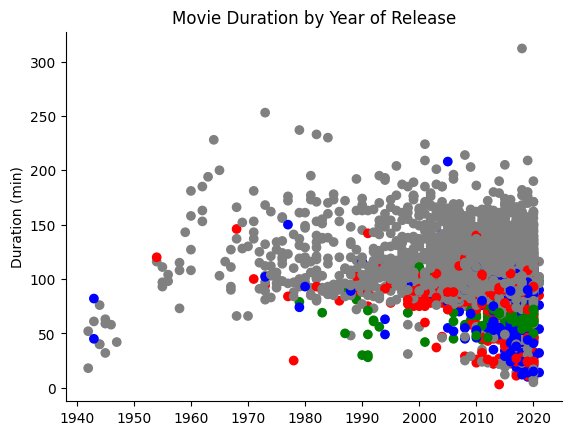

In [23]:
fig,ax = plt.subplots()
ax.scatter(netflix_movies['release_year'], netflix_movies['duration'], c = colors)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

Although there are some clustered on the bottom half, that could indicate that the movies are getting shorter over time, we cannot be certain of that. We will need to look at the date closely to see if there are any trends.

Let's take a look at the average duration of movies by genre.

In [24]:
mean_duration_per_genre = netflix_movies.groupby('genre')['duration'].mean()
mean_duration_per_genre = mean_duration_per_genre.reset_index(name='mean_duration')
mean_duration_per_genre = mean_duration_per_genre.sort_values(by='mean_duration')

In [25]:
mean_duration_movies = netflix_movies['duration'].mean()

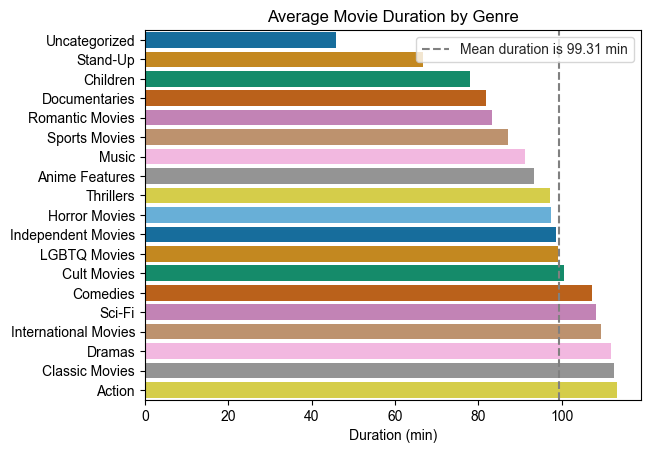

In [26]:
sns.barplot(data=mean_duration_per_genre, y='genre', x='mean_duration', palette='colorblind')
plt.axvline(x=mean_duration_movies, color='grey', linestyle='--', label='Mean duration is {} min'.format(round(mean_duration_movies,2)))
sns.set_style("white")
plt.title('Average Movie Duration by Genre')
plt.ylabel('')
plt.xlabel('Duration (min)')
plt.legend()
plt.show()

We can see that the average duration of movies is around 100 minutes, and that Stand-Up, Children and Documentaries are the shortest on average.Let's examine the average duration of all movies over time.

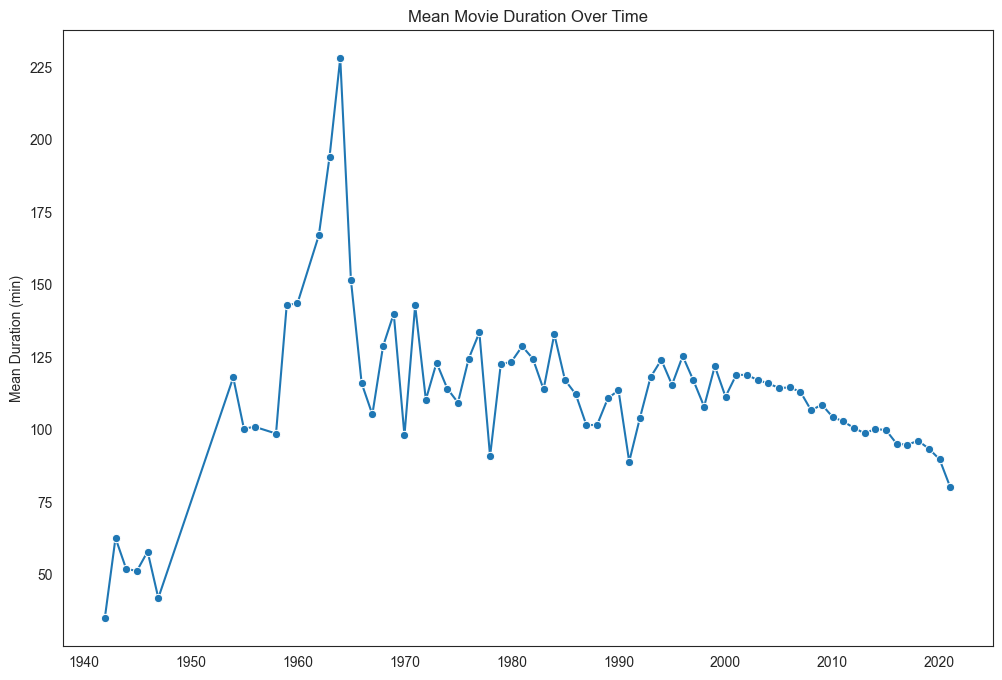

In [27]:
yearly_avg_duration = netflix_movies.groupby(['release_year'])['duration'].mean()
yearly_avg_duration = yearly_avg_duration.reset_index(name='mean_duration')
plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_avg_duration, x='release_year', y='mean_duration', marker='o')
plt.title('Mean Movie Duration Over Time')
plt.xlabel('')
plt.ylabel('Mean Duration (min)')
plt.show()

From the last graph, we can see that the average duration of movies has been declining over time. Let's take a look at the short movies data to see if we can find any trends, that might explain the decline.

Text(0.5, 1.0, 'Number of Short Movies by Genre')

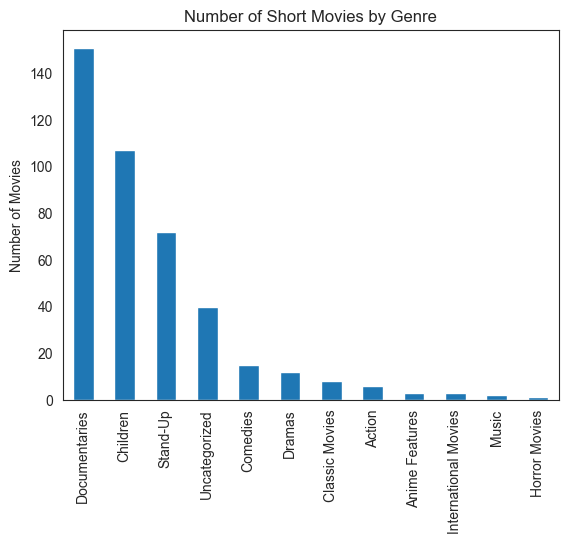

In [28]:
short_movies.value_counts('genre').plot(kind='bar')
plt.ylabel('Number of Movies')
plt.xlabel('')
plt.title('Number of Short Movies by Genre')

Let's examine more closelt the first 3 genres with more short movies.

In [29]:
short_movies_subset = short_movies[short_movies['genre'].isin(['Children','Documentaries','Stand-Up'])]
short_movies_mean = short_movies_subset.groupby(['genre','release_year'])['duration'].mean()
short_movies_mean=short_movies_mean.reset_index(name='mean_duration')

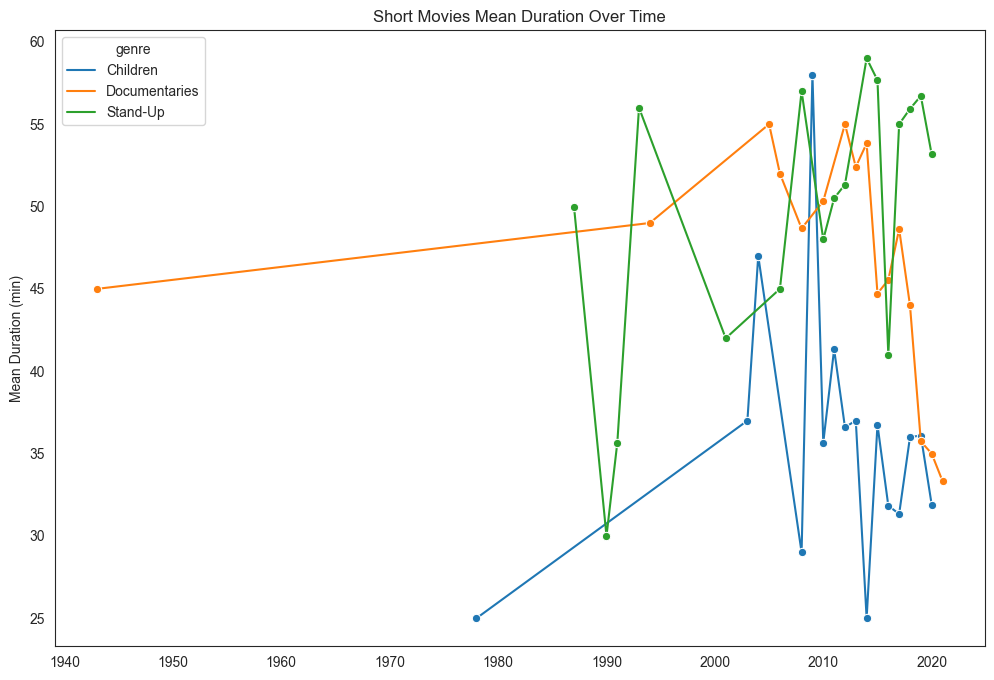

In [30]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=short_movies_mean, x='release_year', y='mean_duration', marker='o', hue='genre')
plt.title('Short Movies Mean Duration Over Time')
plt.xlabel('')
plt.ylabel('Mean Duration (min)')
plt.show()

In [31]:
netflix_movies_subset = netflix_movies[netflix_movies['genre'].isin(['Children','Documentaries','Stand-Up'])]
netflix_movies_subset_mean = netflix_movies_subset.groupby(['genre','release_year'])['duration'].mean()
netflix_movies_subset_mean=netflix_movies_subset_mean.reset_index(name='mean_duration')

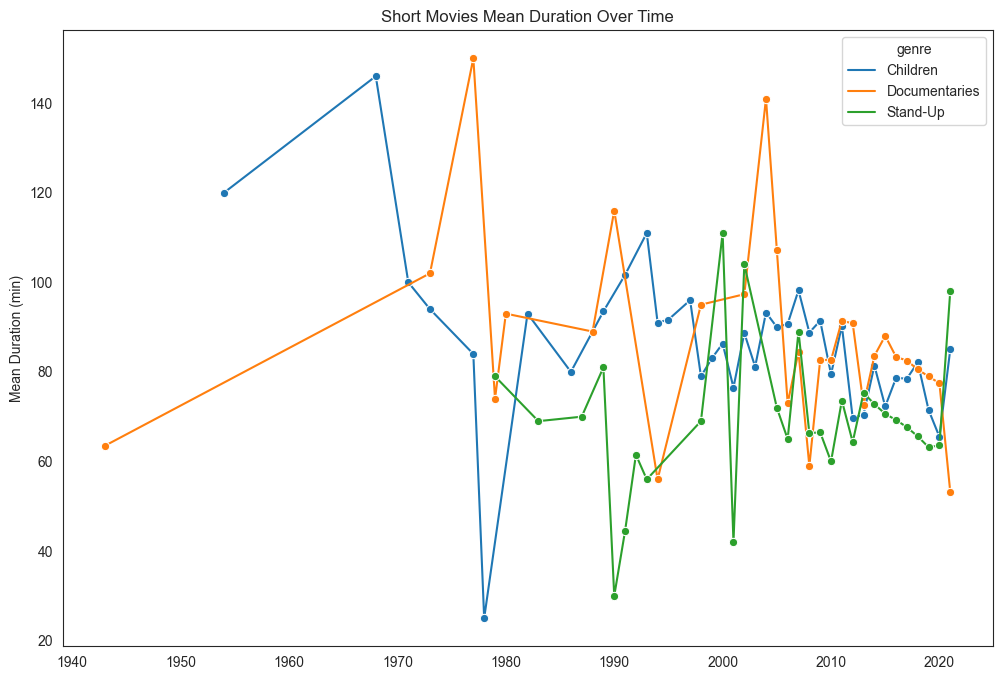

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(netflix_movies_subset_mean, x='release_year', y='mean_duration', marker='o', hue='genre')
plt.title('Short Movies Mean Duration Over Time')
plt.xlabel('')
plt.ylabel('Mean Duration (min)')
plt.show()

In [33]:
netflix_movies_subset_year = netflix_movies_subset.groupby(['genre', 'release_year'])['title'].count()
netflix_movies_subset_year = netflix_movies_subset_year.reset_index(name='count')
netflix_movies_subset_year['decade'] = netflix_movies_subset_year['release_year'].apply(lambda x: str(x)[:3] + '0s')
netflix_movies_subset_year = netflix_movies_subset_year.sort_values(by='decade')

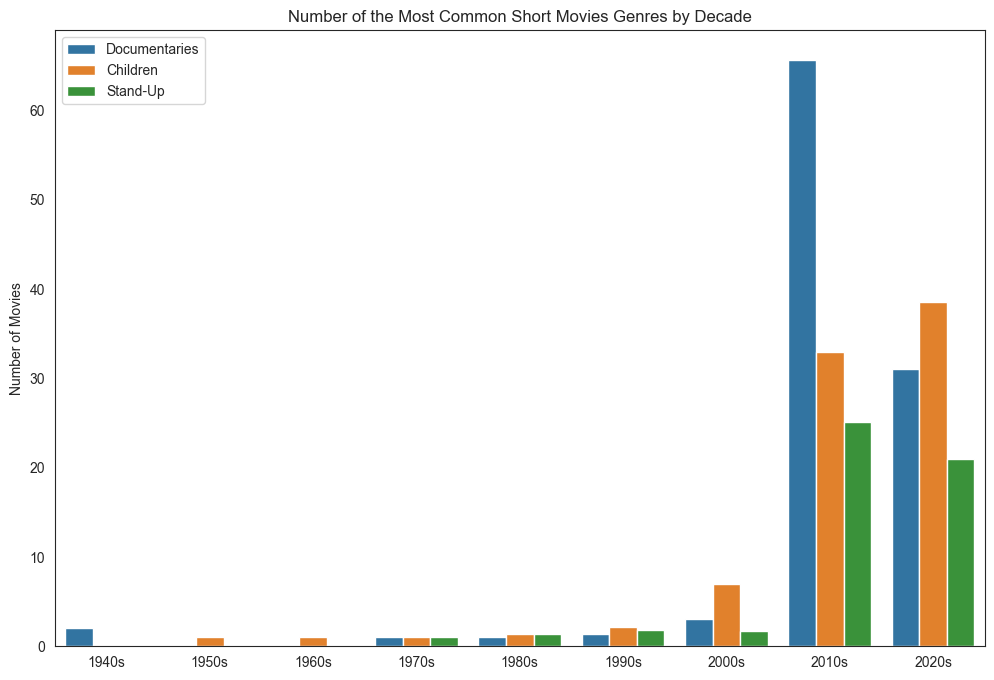

In [34]:
plt.figure(figsize=(12, 8))
sns.barplot(data=netflix_movies_subset_year, x='decade', y='count', hue='genre', errorbar=None)
plt.title('Number of the Most Common Short Movies Genres by Decade')
plt.xlabel('')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left')
plt.show()

Looks like the genres Children, Documentaries and Stand-Up have been on average shorter than regular movies over the last 9 decades. Even more interesting is that Stand-Up movies started to be released in the late 1970s and have been more prolified over the last 30 years. Although Documentaries have been released since the 1940's, they have increased their productin in the last 20 years. Children movies has been followed the same thread as Documentaries and constantly increased their production since 1950s .